In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("d1.csv",delimiter=",",skip_header=1)
data.shape

(100, 2)

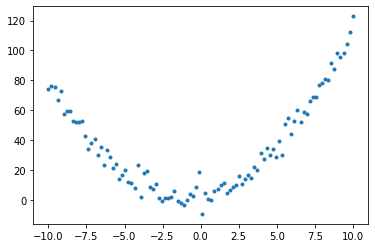

In [3]:
x = data[:,:-1].reshape(-1,1)
y = data[:,-1:].reshape(-1,1)
plt.plot(x,y,'.')

In [4]:
X = np.concatenate(([x**i for i in range(1,3)]),axis=1)
X[:5], X.shape

(array([[-10.        , 100.        ],
        [ -9.7979798 ,  96.00040812],
        [ -9.5959596 ,  92.08244057],
        [ -9.39393939,  88.24609734],
        [ -9.19191919,  84.49137843]]),
 (100, 2))

In [34]:
class LinearRegression:
    def calculate_loss(self,y_hat,y):
        return 0.5 * ((y_hat - y) ** 2).mean()
    
    def calculate_gradient(self,X,y_hat,y):
        return X.T.dot(y_hat - y)/y.size

    def predict(self,w,b,X):
        return X.dot(w) + b
    
    def fit(self,X,y,learning_rate=0.00001,n_epochs=100,batch_size=32,gamma=0.9):
        eps = 1e-6

        w = np.zeros((X.shape[1],1))
        b = np.zeros((1,1))
        n_samples = X.shape[0]

        sdWs = [0]
        sdbs = [0]
        losses = []

        for epoch in range(n_epochs):
            ids = np.random.permutation(n_samples)
            X_shuffled = X[ids]
            y_shuffled = y[ids]
            for i in range(0,n_samples,batch_size):
                Xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]

                y_hat = self.predict(w,b,Xi)
                loss = self.calculate_loss(y_hat,yi)
                dW = self.calculate_gradient(Xi,y_hat,yi)
                db = self.calculate_gradient(np.ones((Xi.shape[0],1)),y_hat,yi)
                
                sdW = gamma * sdWs[-1] + (1 - gamma)*(dW**2)
                sdb = gamma * sdbs[-1] + (1 - gamma)*(db**2)

                w -= learning_rate * dW / np.sqrt(sdW + eps)
                b -= learning_rate * db / np.sqrt(sdb + eps)

                losses.append(loss)
                sdWs.append(sdW)
                sdbs.append(sdb)
        
        self.losses = losses
        self.w = w
        self.b = b



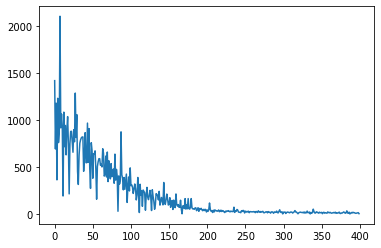

In [35]:
model = LinearRegression()
model.fit(X,y,learning_rate=0.005)
plt.plot(model.losses)

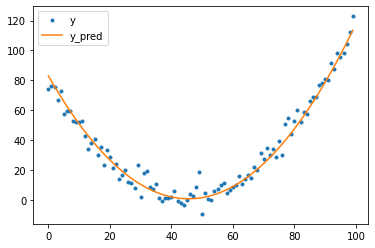

In [36]:
y_pred = model.predict(model.w,model.b,X)
plt.plot(y,'.',label='y')
plt.plot(y_pred,label='y_pred')
plt.legend()